In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the Excel files
all_places_df = pd.read_excel('/content/All Places Census 2016 Population Estimates.xlsx')
all_states_df = pd.read_excel('/content/All states Census 2017 Population Estimates.xlsx')
big_game_census_df = pd.read_excel('/content/Big Game Census data.xlsx')

# Display the first few rows of each DataFrame to understand their structure
print(all_places_df.head())
print(all_states_df.head())
print(big_game_census_df.head())



      Geographic ID  GEOID 2 Geography, full name (City, State)  \
0  1620000US0100124   100124            Abbeville city, Alabama   
1  1620000US0100460   100460           Adamsville city, Alabama   
2  1620000US0100484   100484              Addison town, Alabama   
3  1620000US0100676   100676                Akron town, Alabama   
4  1620000US0100820   100820            Alabaster city, Alabama   

  April 1, 2010 - Census  April 1, 2010 - Estimates Base  \
0                   2688                            2688   
1                   4522                            4522   
2                    758                             756   
3                    356                             356   
4                  30352                           31066   

   Population Estimate (as of July 1) - 2010  \
0                                       2683   
1                                       4517   
2                                        754   
3                                        355

In [2]:
# Summary statistics for each DataFrame
print(all_places_df.describe(include='all'))
print(all_states_df.describe(include='all'))
print(big_game_census_df.describe(include='all'))


           Geographic ID       GEOID 2 Geography, full name (City, State)  \
count              19510  1.951000e+04                              19510   
unique             19510           NaN                              19510   
top     1620000US0100124           NaN            Abbeville city, Alabama   
freq                   1           NaN                                  1   
mean                 NaN  3.008271e+06                                NaN   
std                  NaN  1.461650e+06                                NaN   
min                  NaN  1.001240e+05                                NaN   
25%                  NaN  1.857141e+06                                NaN   
50%                  NaN  2.940709e+06                                NaN   
75%                  NaN  4.202612e+06                                NaN   
max                  NaN  5.686665e+06                                NaN   

       April 1, 2010 - Census  April 1, 2010 - Estimates Base  \
count     

In [35]:
#Data Cleaning
#Check for missing values
print(all_places_df.isnull().sum())
print(all_states_df.isnull().sum())
print(big_game_census_df.isnull().sum())

#Fill or drop missing values
all_places_df = all_places_df.dropna()
all_states_df = all_states_df.dropna()
big_game_census_df = big_game_census_df.dropna()

#Check data types
print(all_places_df.dtypes)
print(all_states_df.dtypes)
print(big_game_census_df.dtypes)

Geographic ID                                0
GEOID 2                                      0
Geography, full name (City, State)           0
April 1, 2010 - Census                       0
April 1, 2010 - Estimates Base               0
Population Estimate (as of July 1) - 2010    0
Population Estimate (as of July 1) - 2011    0
Population Estimate (as of July 1) - 2012    0
Population Estimate (as of July 1) - 2013    0
Population Estimate (as of July 1) - 2014    0
Population Estimate (as of July 1) - 2015    0
Population Estimate (as of July 1) - 2016    0
Population Growth (2010-2016)                0
dtype: int64
GEOID                                        0
GEOID2                                       0
Geography Name                               0
April 1, 2010 - Census                       0
April 1, 2010 - Estimates Base               0
Population Estimate (as of July 1) - 2010    0
Population Estimate (as of July 1) - 2011    0
Population Estimate (as of July 1) - 2012    0


In [15]:
#Identifying key insights

In [16]:
#All places Census 2016 Population Estimates
#Largest and Smallest Cities by Population

In [17]:
#Largest Cities by Population in 2012
largest_cities = all_places_df.nlargest(10, 'Population Estimate (as of July 1) - 2012')
#Smallest Cities by Population in 2013
smallest_cities = all_places_df.nsmallest(10, 'Population Estimate (as of July 1) - 2013')
print("Largest Cities by Population in 2012:")
print(largest_cities[['Geography, full name (City, State)', 'Population Estimate (as of July 1) - 2012']])
print("Smallest Cities by Population in 2013:")
print(smallest_cities[['Geography, full name (City, State)', 'Population Estimate (as of July 1) - 2013']])

Largest Cities by Population in 2012:
      Geography, full name (City, State)  \
11708            New York city, New York   
1442        Los Angeles city, California   
3412              Chicago city, Illinois   
17058                Houston city, Texas   
15312    Philadelphia city, Pennsylvania   
663                Phoenix city, Arizona   
17532            San Antonio city, Texas   
1571          San Diego city, California   
16834                 Dallas city, Texas   
1579           San Jose city, California   

       Population Estimate (as of July 1) - 2012  
11708                                    8361179  
1442                                     3858137  
3412                                     2714120  
17058                                    2166458  
15312                                    1550379  
663                                      1499007  
17532                                    1385250  
1571                                     1338983  
16834             

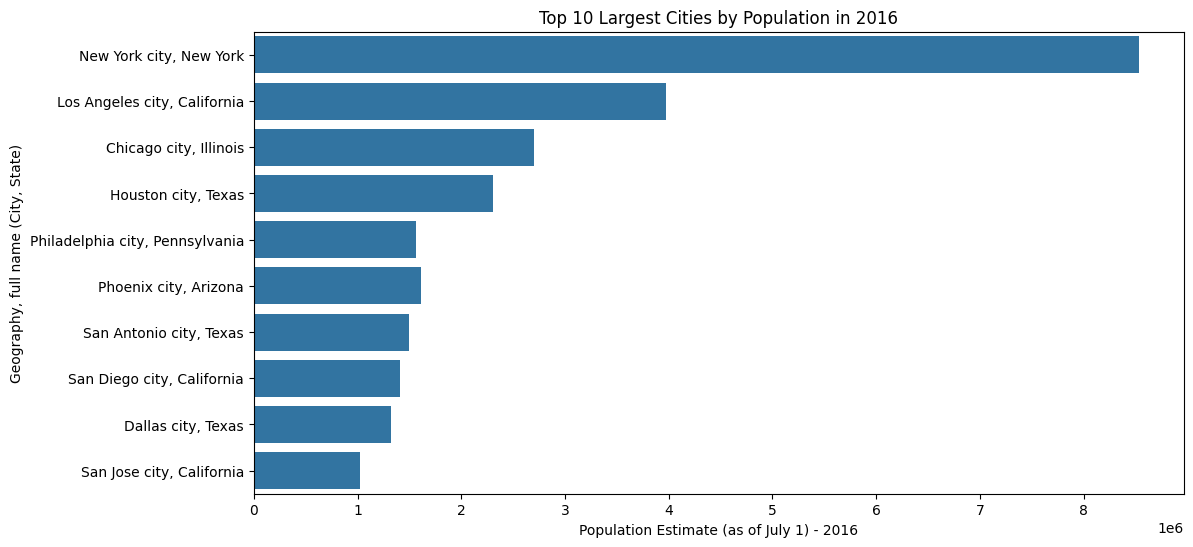

In [28]:
#Visualization for largest cities
plt.figure(figsize=(12, 6))
sns.barplot(data=largest_cities, x='Population Estimate (as of July 1) - 2016', y='Geography, full name (City, State)')
plt.title('Top 10 Largest Cities by Population in 2016')
plt.xlabel('Population Estimate (as of July 1) - 2016')
plt.ylabel('Geography, full name (City, State)')
plt.savefig('largest_cities_2016.png')
plt.show()

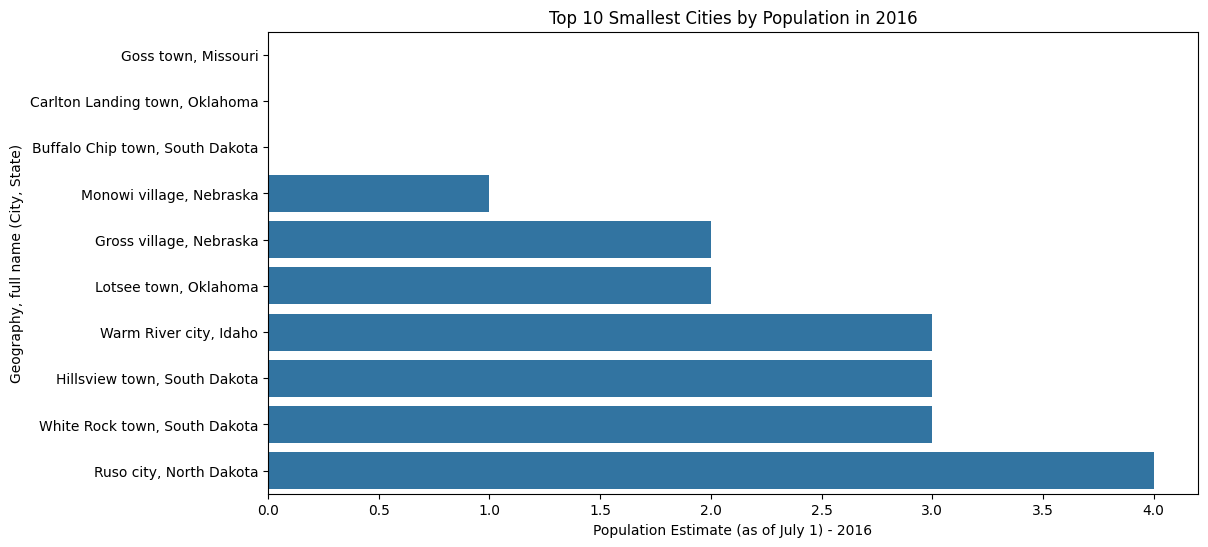

In [29]:
#Visualization for Smallest cities
plt.figure(figsize=(12, 6))
sns.barplot(data=smallest_cities, x='Population Estimate (as of July 1) - 2016', y='Geography, full name (City, State)')
plt.title('Top 10 Smallest Cities by Population in 2016')
plt.xlabel('Population Estimate (as of July 1) - 2016')
plt.ylabel('Geography, full name (City, State)')
plt.savefig('smallest_cities_2016.png')
plt.show()

In [5]:
#Population Growth (2010-2016)
all_places_df['Population Growth (2010-2016)'] = all_places_df['Population Estimate (as of July 1) - 2016'] - all_places_df['Population Estimate (as of July 1) - 2010']
top_growth_cities = all_places_df.nlargest(10, 'Population Growth (2010-2016)')

print("Top 10 Cities by Population Growth (2010-2016):")
print(top_growth_cities[['Geography, full name (City, State)', 'Population Growth (2010-2016)']])


Top 10 Cities by Population Growth (2010-2016):
      Geography, full name (City, State)  Population Growth (2010-2016)
11708            New York city, New York                         345647
17058                Houston city, Texas                         197857
1442        Los Angeles city, California                         180030
663                Phoenix city, Arizona                         164388
17532            San Antonio city, Texas                         158558
16615                 Austin city, Texas                         132303
16834                 Dallas city, Texas                         117218
16937             Fort Worth city, Texas                         105394
12030     Charlotte city, North Carolina                         103490
1571          San Diego city, California                         100477


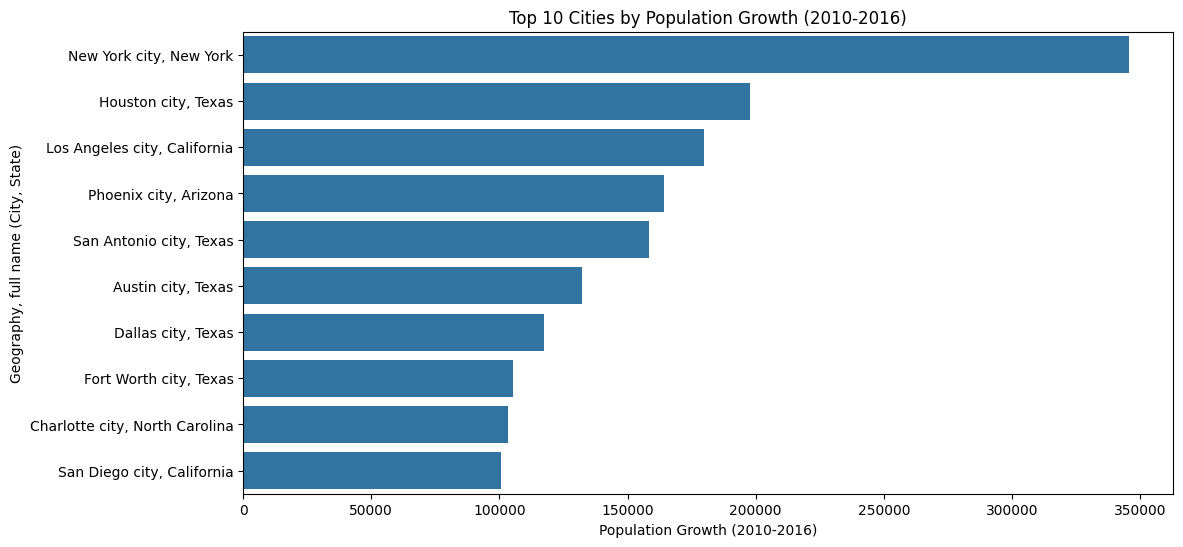

In [30]:
#Visualization for top growth cities
plt.figure(figsize=(12, 6))
sns.barplot(data=top_growth_cities, x='Population Growth (2010-2016)', y='Geography, full name (City, State)')
plt.title('Top 10 Cities by Population Growth (2010-2016)')
plt.xlabel('Population Growth (2010-2016)')
plt.ylabel('Geography, full name (City, State)')
plt.savefig('top_growth_cities_2010_2016.png')
plt.show()

In [9]:
#All State Census 2017 Population Estimates
#State Population Rankings

In [10]:
#State Population Rankings in 2017
state_population_rankings = all_states_df.sort_values(by='Population Estimate (as of July 1) - 2017', ascending=False)

print("State Population Rankings in 2017:")
print(state_population_rankings[['Geography Name', 'Population Estimate (as of July 1) - 2017']])

State Population Rankings in 2017:
          Geography Name  Population Estimate (as of July 1) - 2017
4             California                                   39536653
43                 Texas                                   28304596
9                Florida                                   20984400
32              New York                                   19849399
38          Pennsylvania                                   12805537
13              Illinois                                   12802023
35                  Ohio                                   11658609
10               Georgia                                   10429379
33        North Carolina                                   10273419
22              Michigan                                    9962311
30            New Jersey                                    9005644
46              Virginia                                    8470020
47            Washington                                    7405743
2            

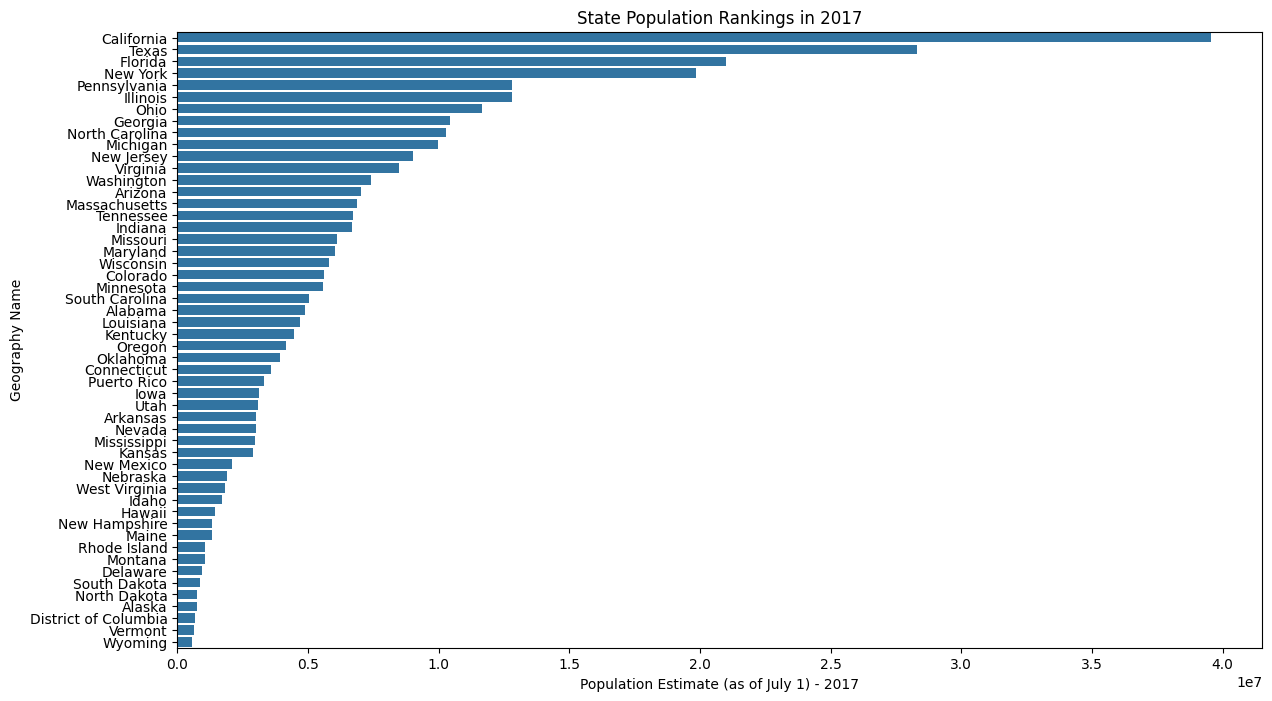

In [31]:
#Visualization for state population rankings
plt.figure(figsize=(14, 8))
sns.barplot(data=state_population_rankings, x='Population Estimate (as of July 1) - 2017', y='Geography Name')
plt.title('State Population Rankings in 2017')
plt.xlabel('Population Estimate (as of July 1) - 2017')
plt.ylabel('Geography Name')
plt.savefig('state_population_rankings_2017.png')
plt.show()

In [13]:
#Population Growth (2010-2017)
all_states_df['Population Growth (2010-2017)'] = all_states_df['Population Estimate (as of July 1) - 2017'] - all_states_df['Population Estimate (as of July 1) - 2010']
top_growth_states = all_states_df.nlargest(10, 'Population Growth (2010-2017)')

print("Top 10 States by Population Growth (2010-2017):")
print(top_growth_states[['Geography Name', 'Population Growth (2010-2017)']])

Top 10 States by Population Growth (2010-2017):
    Geography Name  Population Growth (2010-2017)
43           Texas                        3062948
4       California                        2208963
9          Florida                        2137939
10         Georgia                         716683
33  North Carolina                         699172
47      Washington                         664357
2          Arizona                         609268
5         Colorado                         559125
46        Virginia                         444814
32        New York                         444214


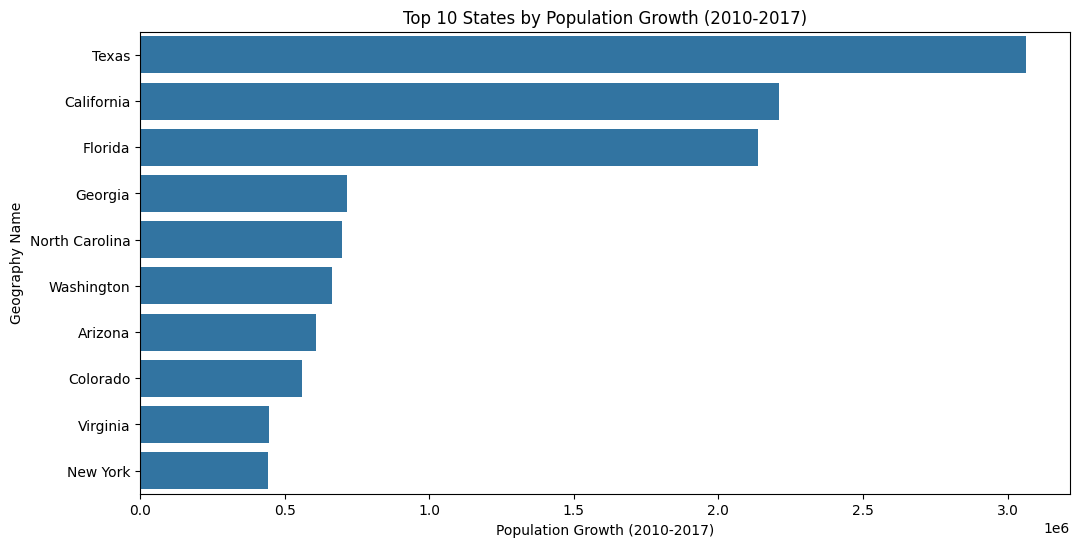

In [32]:
#visualization for Top Growth States
plt.figure(figsize=(12, 6))
sns.barplot(data=top_growth_states, x='Population Growth (2010-2017)', y='Geography Name')
plt.title('Top 10 States by Population Growth (2010-2017)')
plt.xlabel('Population Growth (2010-2017)')
plt.ylabel('Geography Name')
plt.savefig('top_growth_states_2010_2017.png')
plt.show()

In [18]:
#Big Game Census Data

In [23]:
#Players Distribution by State
players_by_state = big_game_census_df['Player Birth State'].value_counts().reset_index()
players_by_state.columns = ['Player Birth State', 'Number of Players']
print("Players Distribution by State:")
print(players_by_state)

Players Distribution by State:
   Player Birth State  Number of Players
0          California                 15
1               Texas                 14
2             Florida                 13
3                Ohio                  9
4          New Jersey                  7
5            New York                  5
6            Maryland                  4
7      North Carolina                  4
8             Georgia                  4
9              Nevada                  3
10           Illinois                  3
11        Mississippi                  3
12       Pennsylvania                  3
13          Tennessee                  2
14          Louisiana                  2
15           Delaware                  2
16               Iowa                  2
17           Michigan                  2
18             Oregon                  2
19            Alabama                  2
20     South Carolina                  2
21             Hawaii                  2
22            Montana     

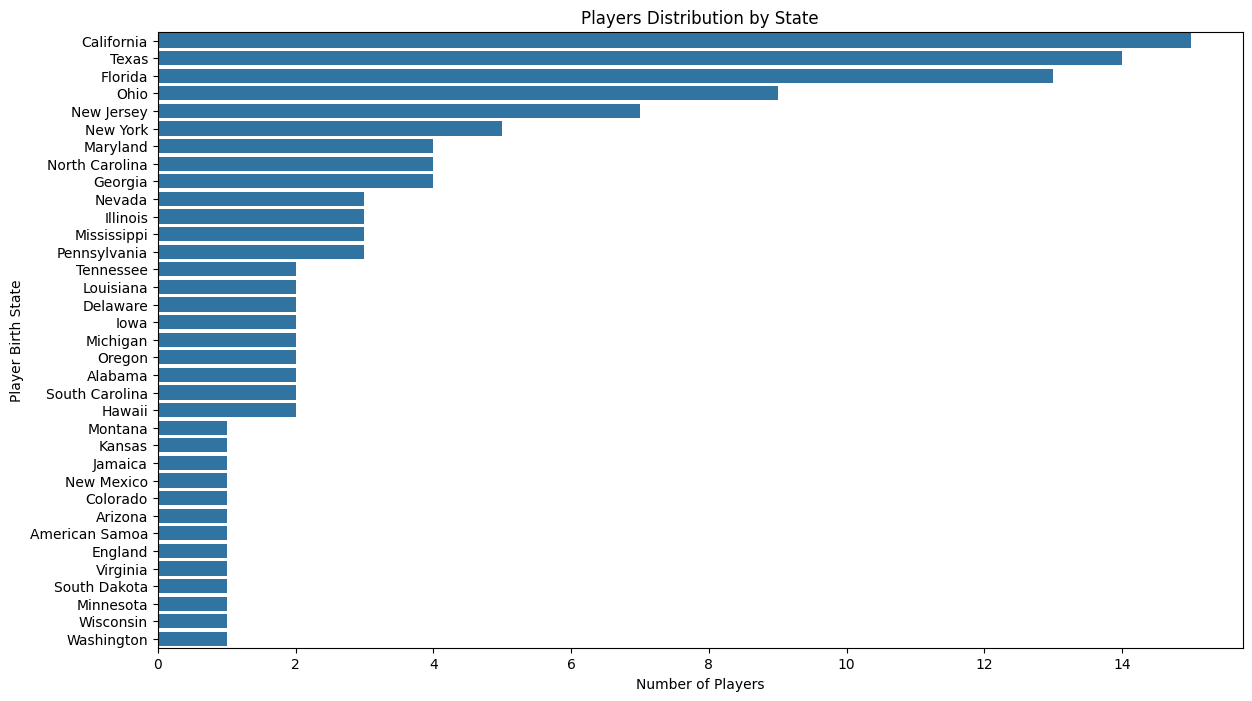

In [33]:
#Visualization for Players Distribution by State
plt.figure(figsize=(14, 8))
sns.barplot(data=players_by_state, x='Number of Players', y='Player Birth State')
plt.title('Players Distribution by State')
plt.xlabel('Number of Players')
plt.ylabel('Player Birth State')
plt.savefig('players_distribution_by_state.png')
plt.show()

In [26]:
#Player Distribution by Team
players_by_team = big_game_census_df['Player Team'].value_counts().reset_index()
players_by_team.columns = ['Player Team', 'Number of Players']
print("Players Distribution by Team:")
print(players_by_team)

Players Distribution by Team:
    Player Team  Number of Players
0   New England                 60
1  Philadelphia                 58


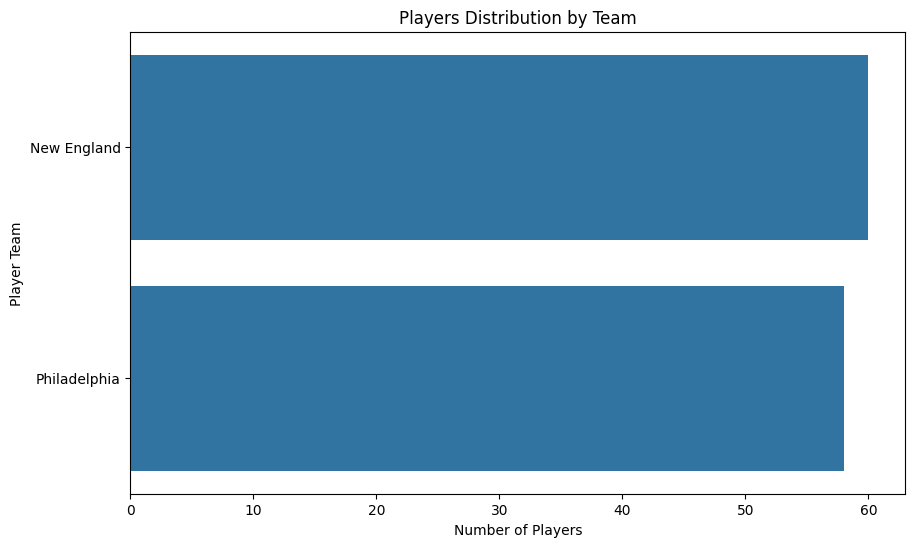

In [34]:
#visualization for players distribution by team
plt.figure(figsize=(10, 6))
sns.barplot(data=players_by_team, x='Number of Players', y='Player Team')
plt.title('Players Distribution by Team')
plt.xlabel('Number of Players')
plt.ylabel('Player Team')
plt.savefig('players_distribution_by_team.png')
plt.show()

In [36]:
#Export Cleaned data for Tableau
#Save cleaned data to CSv files
all_places_df.to_csv('all_places_df.csv', index=False)
all_states_df.to_csv('all_states_df.csv', index=False)
big_game_census_df.to_csv('big_game_census_df.csv', index=False)

In [37]:
#Download Cleaned data files
from google.colab import files
files.download('all_places_df.csv')
files.download('all_states_df.csv')
files.download('big_game_census_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>